<a href="https://colab.research.google.com/github/yhp2205/2023Project/blob/main/Note/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1_%EB%82%B4%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')

In [3]:
#csv 파일 경로 설정
trainCSV = '/content/drive/MyDrive/구글클라우드인공지능개발자과정/코드/scikit-learn/data/titanic/train.csv'
testCSV = '/content/drive/MyDrive/구글클라우드인공지능개발자과정/코드/scikit-learn/data/titanic/test.csv'

In [4]:
# 기본 패키지 불러오기
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#csv 파일 불러오기
train_df = pd.read_csv(trainCSV)
test_df = pd.read_csv(testCSV)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Age의 평균값으로 결측치 채운 후 결측치 없는지 확인
train_df['Age'].fillna(
    train_df['Age'].mean(),
    inplace = True)

train_df['Age'].isnull().sum()

0

In [9]:
# Embarked 결측치를 채우고, 결측치 확인
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
train_df['Embarked'].isnull().sum()

0

In [10]:
train_df.drop(labels = 'Cabin', axis = 1, inplace = True)

In [11]:
train_df['age_cat'] = pd.cut(train_df['Age'],
                             bins=[0, 3, 7, 15, 30, 60, 100],
                             include_lowest=True,
                             labels=['baby', 'children', 'teenage',
                                     'young', 'adult', 'old'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


In [12]:
# male 과 female 문자열은 학습이 불가능하여 타입 변환
from sklearn.preprocessing import LabelEncoder
# 1. 레이블 엔코더 객체 생성
le = LabelEncoder()

# 2. fit_transform으로 데이터 변환
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['age_cat'] = le.fit_transform(train_df['age_cat'])
train_df['Familysize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1
train_df['IsAlone'].loc[train_df['Familysize']>1]=0
train_df['Title'] = train_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
stat_min = 10
title_names = (train_df['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
train_df['Title'] = train_df['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

train_df['Title'] = le.fit_transform(train_df['Title'])

<ipython-input-12-789666881a7e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['IsAlone'].loc[train_df['Familysize']>1]=0


In [13]:
def categorize_family_size(size):
    if size == 0:
        return "Alone"
    elif 1 <= size <= 3:
        return "Medium"
    else:
        return "Large"

# Step 3: Apply the function to create a new column "FamilyCategory"
train_df['FamilyCategory'] = train_df['Familysize'].apply(categorize_family_size)

train_df['FamilyCategory'] = le.fit_transform(train_df['FamilyCategory'])

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Embarked        891 non-null    object 
 11  age_cat         891 non-null    int64  
 12  Familysize      891 non-null    int64  
 13  IsAlone         891 non-null    int64  
 14  Title           891 non-null    int64  
 15  FamilyCategory  891 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 111.5+ KB


In [16]:
# 훈련에 사용할 컬럼 골라내기
# 데이터셋을 훈련과 테스트로 나누기
# 모델 설정 (Logistic Regression, Decision Tree, SVC)
# 모델 학습
# 모델 평가하기
# confusion matrix
# accuracy, recall, precision, F1

In [17]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat,Familysize,IsAlone,Title,FamilyCategory
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S,5,2,0,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,0,2,0,4,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S,5,1,1,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S,0,2,0,4,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S,0,1,1,3,1
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,Q,5,1,1,3,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,S,0,1,1,3,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,S,1,5,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,S,5,3,0,4,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C,4,2,0,4,1


<ipython-input-18-ca4c679a4df3>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


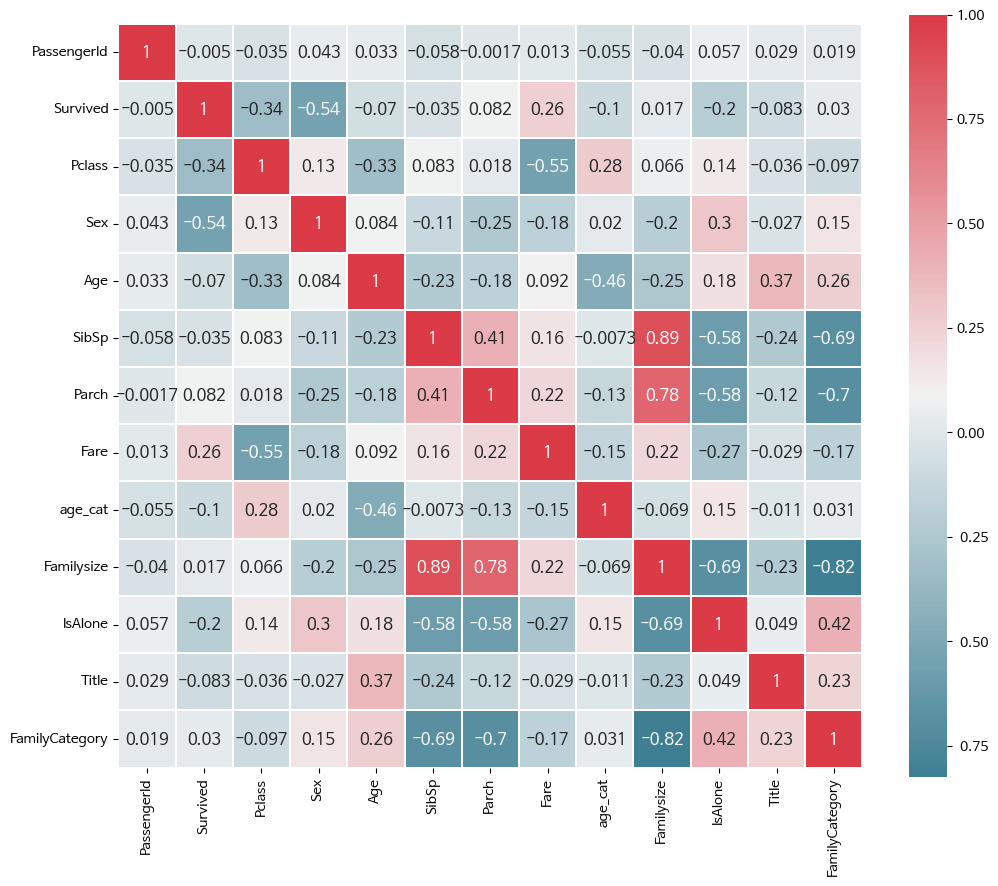

In [18]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 11))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
correlation_heatmap(train_df)

In [19]:
selList = ['Pclass', 'Age', 'Fare', 'Sex', 'Survived', 'age_cat', 'Familysize', 'Title']
# 위에서 선택한 리스트 컬럼만 골라서 새로 df 생성
sel_df = train_df[selList]
sel_df

,Pclass,Age,Fare,Sex,Survived,age_cat,Familysize,Title
0,3,22.000000,7.2500,1,0,5,2,3
1,1,38.000000,71.2833,0,1,0,2,4
2,3,26.000000,7.9250,0,1,5,1,2
3,1,35.000000,53.1000,0,1,0,2,4
4,3,35.000000,8.0500,1,0,0,1,3
...,...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,1,0,5,1,1
887,1,19.000000,30.0000,0,1,5,1,2
888,3,29.699118,23.4500,0,0,5,4,2
889,1,26.000000,30.0000,1,1,5,1,3


In [20]:
from sklearn.model_selection import train_test_split

test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(sel_df.drop(['Survived'],axis=1), sel_df['Survived'], test_size=test_size, random_state=123, stratify=sel_df['Survived'])

In [21]:
x_train.shape, x_test.shape

((712, 7), (179, 7))

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# step 1. 모델 객체 생성
model = LogisticRegression()

# STEP 2. 모델 학습
model.fit(x_train, y_train)

# STEP 3. 모델 예측
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(50.722222222222214, 0.5, 'actual')

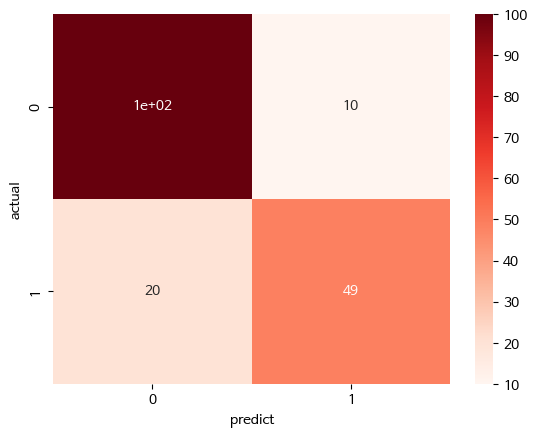

In [23]:
import matplotlib.pyplot as plt

# Logisitic Regression 성능 평가
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Reds')
plt.xlabel('predict')
plt.ylabel('actual')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average = 'micro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

0.8324022346368715
0.8324022346368715
0.8096179183135706
0.8175951086956522


In [29]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

# VotingClassifier 학습, 예측, 평가
vo_clf.fit(x_train, y_train)
pred = vo_clf.predict(x_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습, 예측, 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.7821
LogisticRegression 정확도: 0.8324
KNeighborsClassifier 정확도: 0.6927


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [32]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7654


In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[300, 400],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[4, 8, 12, 18],
    'min_samples_split':[8, 16, 20, 28]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 300}
최고 예측 정확도: 0.8202


In [38]:
rf_clf1 = RandomForestClassifier(n_estimators = 300, max_depth=6, min_samples_leaf=8, min_samples_split=20, random_state=0)
rf_clf1.fit(x_train, y_train)
pred = rf_clf1.predict(x_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.8324


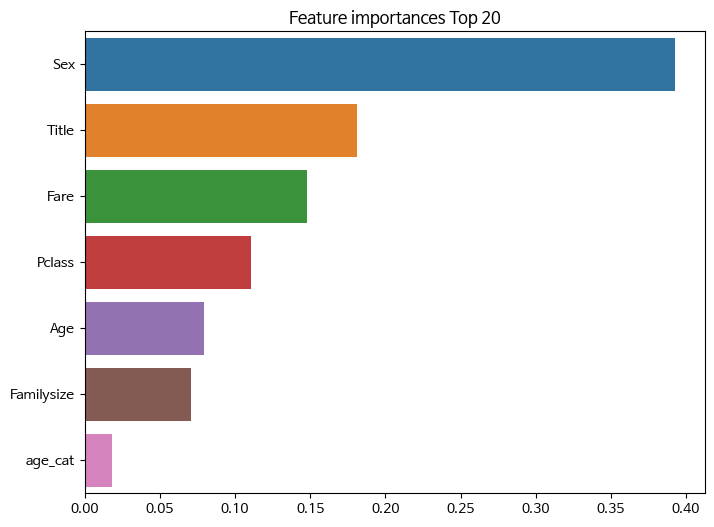

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=x_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('rf_feature_importances_top20.tif', format='tif', dpi=300, bbox_inches='tight')

### XGBoost

In [41]:
import xgboost

print(xgboost.__version__)

2.0.0


In [42]:
import xgboost as xgb
from xgboost import plot_importance


In [83]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 156)

In [84]:
dtr = xgb.DMatrix(data = x_tr, label=y_tr)
dval = xgb.DMatrix(data = x_val, label = y_val)
dtest = xgb.DMatrix(data = x_test, label = y_test)

In [140]:
params = {'max_depth':6,
          'eta':0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
         }
num_rounds = 300

In [141]:
eval_list = [(dtr, 'train'), (dval, 'eval')]

xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round = num_rounds, early_stopping_rounds=50, evals = eval_list)

[0]	train-logloss:0.63819	eval-logloss:0.67226
[1]	train-logloss:0.61559	eval-logloss:0.65737
[2]	train-logloss:0.59511	eval-logloss:0.64525
[3]	train-logloss:0.57643	eval-logloss:0.63337
[4]	train-logloss:0.55942	eval-logloss:0.62383
[5]	train-logloss:0.54388	eval-logloss:0.61478
[6]	train-logloss:0.52942	eval-logloss:0.60616
[7]	train-logloss:0.51631	eval-logloss:0.59873
[8]	train-logloss:0.50395	eval-logloss:0.59136
[9]	train-logloss:0.49148	eval-logloss:0.58431
[10]	train-logloss:0.47985	eval-logloss:0.57824
[11]	train-logloss:0.46904	eval-logloss:0.57145
[12]	train-logloss:0.45892	eval-logloss:0.56693
[13]	train-logloss:0.44913	eval-logloss:0.56132
[14]	train-logloss:0.44031	eval-logloss:0.55746
[15]	train-logloss:0.43186	eval-logloss:0.55270
[16]	train-logloss:0.42426	eval-logloss:0.54988
[17]	train-logloss:0.41677	eval-logloss:0.54673
[18]	train-logloss:0.40980	eval-logloss:0.54491
[19]	train-logloss:0.40313	eval-logloss:0.54284
[20]	train-logloss:0.39726	eval-logloss:0.54080
[2

In [142]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.079 0.973 0.088 0.937 0.638 0.706 0.137 0.079 0.138 0.962]
예측값 10개만 표시: [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]


In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [144]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[99 11]
 [17 52]]
정확도: 0.8436, 정밀도: 0.8254, 재현율: 0.7536,    F1: 0.7879, AUC:0.8679


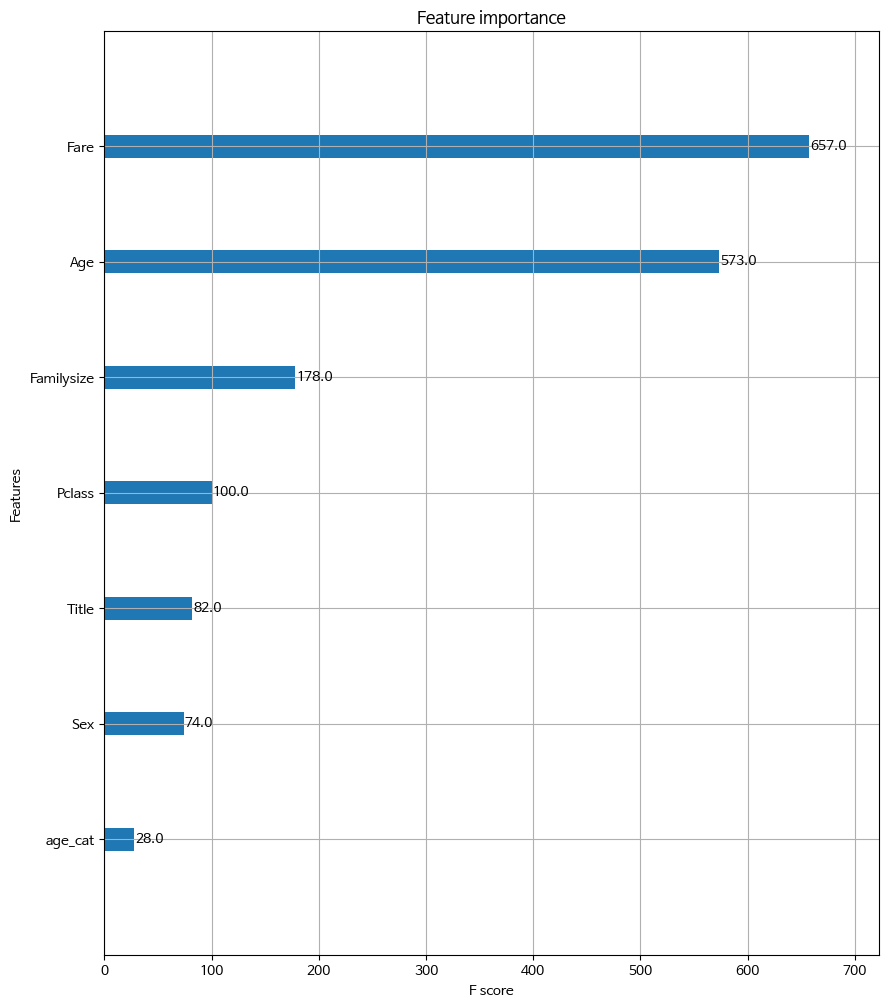

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
plt.savefig('p239_xgb_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

In [101]:
accuracy = accuracy_score(y_test , preds)
accuracy

0.8435754189944135

## LightGBM

In [94]:
import lightgbm

print(lightgbm.__version__)

4.0.0


In [110]:
from lightgbm.callback import early_stopping
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators = 300, learning_rate = 0.05)

evals = [(x_tr,y_tr), (x_val, y_val)]
lgbm_wrapper.fit(x_tr, y_tr, eval_metric="logloss", early_stopping_rounds = 50, eval_set = evals)
preds = lgbm_wrapper.predict(x_test)
pred_proba = lgbm_wrapper.predict_proba(x_test)[:,1]

TypeError: ignored

In [107]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [108]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[90 20]
 [22 47]]
정확도: 0.7654, 정밀도: 0.7015, 재현율: 0.6812,    F1: 0.6912, AUC:0.8559


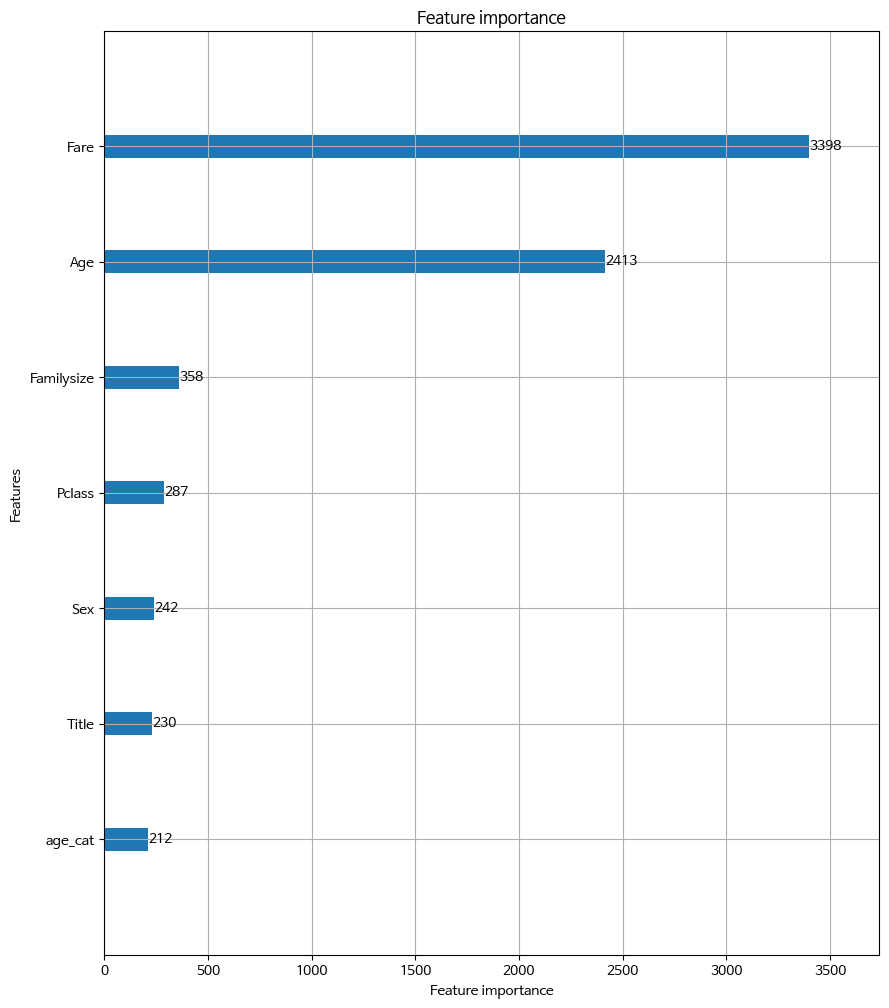

In [109]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)
plt.savefig('lightgbm_feature_importance.tif', format='tif', dpi=300, bbox_inches='tight')

In [111]:
import hyperopt

print(hyperopt.__version__)

0.2.7


In [112]:
from hyperopt import hp

search_space = {'x':hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

In [114]:
from hyperopt import STATUS_OK

from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

In [116]:
from hyperopt import fmin, tpe, Trials
trial_val = Trials()

best_01 = fmin(fn=objective_func, space = search_space, algo=tpe.suggest, max_evals=20,
               trials = trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 20/20 [00:00<00:00, 398.79trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [117]:
trial_val = Trials()

# max_evals를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20
               , trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 658.15trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [118]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [119]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [120]:
import pandas as pd

# results에서 loss 키값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses': losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


In [132]:
# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2 사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth': hp.quniform('max_depth', 3, 20, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 2, 1),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
                   }

In [133]:
# fmin()에서 입력된 search_space 값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 nestimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'],
                            eval_metric='logloss')
    accuracy = cross_val_score(xgb_clf, x_train, y_train, scoring='accuracy', cv=3)

    # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
    return {'loss':-1 * np.mean(accuracy), 'status': STATUS_OK}


In [134]:
from hyperopt import fmin, tpe, Trials
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)


100%|██████████| 50/50 [00:09<00:00,  5.22trial/s, best loss: -0.8468839012398207]
best: {'colsample_bytree': 0.646364433721413, 'learning_rate': 0.03536796898258727, 'max_depth': 17.0, 'min_child_weight': 1.0}


In [128]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(
    round(best['colsample_bytree'], 5), round(best['learning_rate'], 5),
    int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.6256, learning_rate:0.03111, max_depth:11, min_child_weight:1


In [129]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [131]:
xgb_wrapper = XGBClassifier(n_estimators=300,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5)
                           )

evals = [(x_tr, y_tr), (x_val, y_val)]
xgb_wrapper.fit(x_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
                eval_set=evals, verbose=True)

preds = xgb_wrapper.predict(x_test)
pred_proba = xgb_wrapper.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.65198	validation_1-logloss:0.68047
[1]	validation_0-logloss:0.63634	validation_1-logloss:0.67205
[2]	validation_0-logloss:0.62302	validation_1-logloss:0.66519
[3]	validation_0-logloss:0.60891	validation_1-logloss:0.65537
[4]	validation_0-logloss:0.59721	validation_1-logloss:0.64690
[5]	validation_0-logloss:0.58427	validation_1-logloss:0.63857
[6]	validation_0-logloss:0.57361	validation_1-logloss:0.63120
[7]	validation_0-logloss:0.56469	validation_1-logloss:0.62365
[8]	validation_0-logloss:0.55636	validation_1-logloss:0.61681
[9]	validation_0-logloss:0.54848	validation_1-logloss:0.61050
[10]	validation_0-logloss:0.53843	validation_1-logloss:0.60530
[11]	validation_0-logloss:0.52928	validation_1-logloss:0.59863
[12]	validation_0-logloss:0.52149	validation_1-logloss:0.59168
[13]	validation_0-logloss:0.51227	validation_1-logloss:0.58706
[14]	validation_0-logloss:0.50566	validation_1-logloss:0.58470
[15]	validation_0-logloss:0.49741	validation_1-logloss:0.58039
[1